Understanding the data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [5]:
# Load Train Dataset

Train = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Train/Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Train/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Train/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Train/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

Test = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Test/Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Test/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Test/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("C:/Users/Asus/Desktop/Final_Implementation/Data/Test/Test_Outpatientdata-1542969243754.csv")

In [6]:
Train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [7]:
Test.columns

Index(['Provider'], dtype='object')

In [8]:
Train_Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

BeneID: Represents the unique identifier assigned to each beneficiary.

DOB: Denotes the beneficiary’s date of birth.

DOD: Refers to the date of death of the beneficiary, applicable only if the individual is deceased; otherwise, it remains null.

Gender, Race, State, Country: These fields capture demographic details including the beneficiary’s gender, race, state of residence, and country.

RenalDiseaseIndicator: Specifies whether the beneficiary has been diagnosed with a kidney-related condition.

ChronicCond_*: Any column prefixed with "ChronicCond_" indicates the presence of a specific chronic illness in the patient, which also contributes to evaluating the individual's health risk score.

IPAnnualReimbursementAmt: Indicates the maximum annual reimbursement available for inpatient hospital services.

IPAnnualDeductibleAmt: Reflects the annual amount paid by the patient as a deductible for inpatient care.

OPAnnualReimbursementAmt: Represents the maximum reimbursement provided per year for outpatient services.

OPAnnualDeductibleAmt: Shows the annual deductible amount the patient pays for outpatient visits.

In [9]:
len(Train_Beneficiary.columns)

25

In [10]:
len(Test_Beneficiary.columns)

25

In [11]:
Train_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

Outpatient column Descriptions

BeneID: Identifies each beneficiary (i.e., patient) with a unique ID.

ClaimID: A distinct identifier assigned to each insurance claim submitted by the healthcare provider.

ClaimStartDt: Records the date when the claim began, formatted as yyyy-mm-dd.

ClaimEndDt: Records the date when the claim concluded, formatted as yyyy-mm-dd.

Provider: Denotes the unique identifier of the healthcare provider submitting the claim.

InscClaimAmtReimbursed: Represents the amount reimbursed for the specific claim.

AttendingPhysician: Contains the unique ID of the physician who primarily attended to the patient.

OperatingPhysician: Captures the ID of the physician who performed surgical or operative procedures on the patient.

OtherPhysician: Refers to any additional physician involved in the patient's care, apart from the attending and operating physicians.

ClmDiagnosisCode: Lists the diagnostic codes applied by the provider for the patient’s treatment under the given claim.

ClmProcedureCode: Contains the procedure codes associated with the patient’s treatment for that particular claim.

DeductibleAmtPaid: Indicates the amount paid by the patient, calculated as the difference between the total claim amount and the reimbursed amount.



In [12]:
len(Train_Outpatient.columns)

27

In [13]:
len(Test_Outpatient.columns)

27

In [14]:
Train_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

AdmissionDt: It contains the date on which the patient was admitted into hospital in yyyy-mm-dd format.
DischargeDt: It contains the date on which the patient was discharged from the hospital in yyyy-mm-dd format.
DiagnosisGroupCode: It contains group code for the diagnosis done on the patient.

In [15]:
len(Train_Inpatient.columns)

30

In [16]:
len(Test_Inpatient.columns)

30

In [17]:
 # functions for adding percentage on top of bar plot with hue and without hue
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()

def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

# Analyzing Provider Data

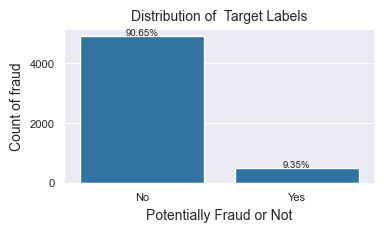

In [18]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(4,2))
sns.set_style('darkgrid')
ax = sns.countplot(x='PotentialFraud',data=Train)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.title('Distribution of  Target Labels', fontsize=10)
plt.xlabel('Potentially Fraud or Not', size = 10)
plt.ylabel('Count of fraud', size = 10)
percentage_without_hue(ax, Train['PotentialFraud'], 0,20,7)

Observation:
This is an highly imbalanced dataset. There are 10% fraudulent providers and 90% non-fraudulent providers.

# Analyzing Beneficiary Data

In [19]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [20]:
Train_Beneficiary['ChronicCond_Alzheimer'].unique()

array([1, 2])

In [21]:
Train_Beneficiary['RenalDiseaseIndicator'].unique()

array(['0', 'Y'], dtype=object)

In [22]:
#Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [23]:
# convert all these columns datatypes to numeric
Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


In [24]:
# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good

Train_Beneficiary['Patient_Risk_Score'] = Train_Beneficiary['ChronicCond_Alzheimer'] + Train_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiary['ChronicCond_KidneyDisease'] + Train_Beneficiary['ChronicCond_Cancer'] +\
                                        Train_Beneficiary['ChronicCond_ObstrPulmonary'] + Train_Beneficiary['ChronicCond_Depression'] +\
                                    Train_Beneficiary['ChronicCond_Diabetes'] + Train_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiary['ChronicCond_Osteoporasis'] + Train_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiary['ChronicCond_stroke'] + Train_Beneficiary['RenalDiseaseIndicator']

# calculate patient risk score by summing up all risk scores
Test_Beneficiary['Patient_Risk_Score'] = Test_Beneficiary['ChronicCond_Alzheimer'] + Test_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Test_Beneficiary['ChronicCond_KidneyDisease'] + Test_Beneficiary['ChronicCond_Cancer'] +\
                                        Test_Beneficiary['ChronicCond_ObstrPulmonary'] + Test_Beneficiary['ChronicCond_Depression'] +\
                                    Test_Beneficiary['ChronicCond_Diabetes'] + Test_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Test_Beneficiary['ChronicCond_Osteoporasis'] + Test_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Test_Beneficiary['ChronicCond_stroke'] + Test_Beneficiary['RenalDiseaseIndicator']
#

In [25]:
Train_Beneficiary['Gender'].unique()

array([1, 2])

In [26]:
# Replacing '2' with '0' for Gender Type
Train_Beneficiary = Train_Beneficiary.replace({'Gender': 2}, 0)

Test_Beneficiary = Test_Beneficiary.replace({'Gender': 2}, 0)

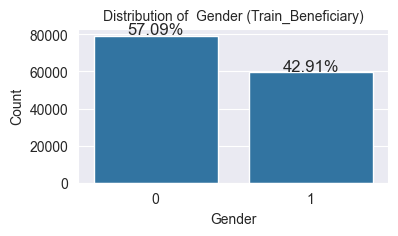

In [27]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(4,2))
ax = sns.countplot(x='Gender',data=Train_Beneficiary, order = Train_Beneficiary['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiary)', fontsize=10)
plt.xlabel('Gender', size = 10)
plt.ylabel('Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['Gender'], 0,800,12)

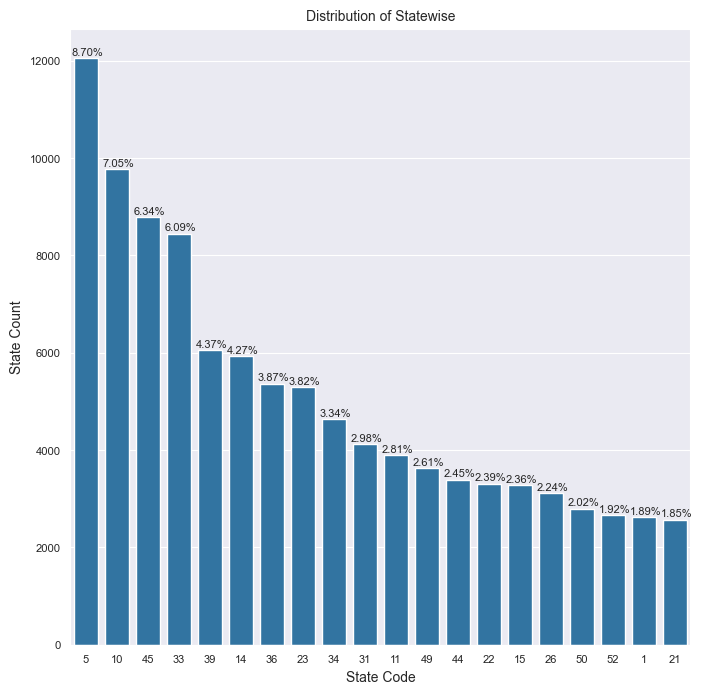

In [28]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='State',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['State'].value_counts().head(20).index)
plt.title('Distribution of Statewise', fontsize=10)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('State Code', size = 10)
plt.ylabel('State Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['State'], 0.05, 60,8)

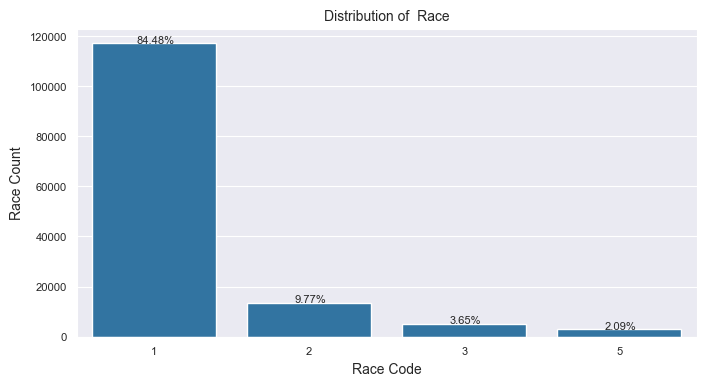

In [29]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Race',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Race'].value_counts().index)
plt.title('Distribution of  Race', fontsize=10)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('Race Code', size = 10)
plt.ylabel('Race Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 100,8)

Observation:
Race 1 is the most in terms of beneficiary count.
85% beneficiaries belongs to race 1.
There is no race 4 in the dataset

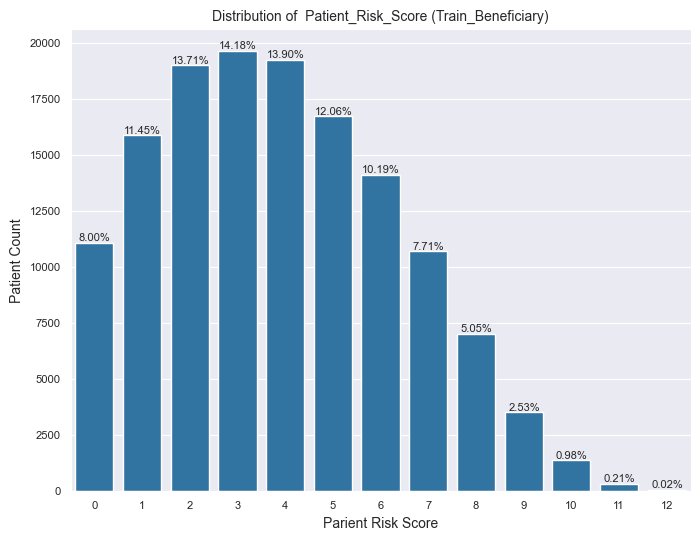

In [30]:
# Distribition of patient risk score
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Train_Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score (Train_Beneficiary)', fontsize=10)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('Parient Risk Score', size = 10)
plt.ylabel('Patient Count', size = 10)
percentage_without_hue(ax, Train_Beneficiary['Patient_Risk_Score'], 0.01, 100,8)

Observation:
The distribution of patient risk scores is right-skewed, with the majority of patients having risk scores between 2 and 5. Higher risk scores, such as 9 through 12, are relatively rare.



In [31]:
# Calculate total inpatient reimbursement amount for all the beneficiaries
Train_Beneficiary.IPAnnualReimbursementAmt.sum()


np.int64(507162970)

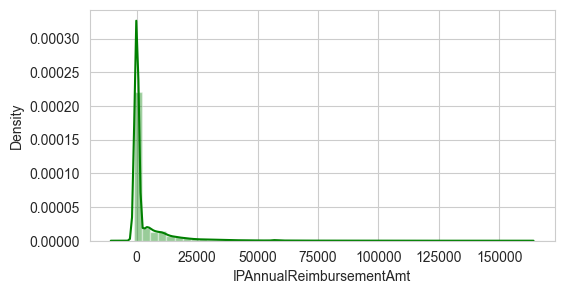

In [32]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(6, 3))
sns.distplot(Train_Beneficiary['IPAnnualReimbursementAmt'],  kde=True, color ='green', bins = 50)
plt.show()

In [33]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

25 , 0.0 || 50 , 0.0 || 75 , 2280.0 || 100 , 161470.0 || 

In [34]:
Train_Beneficiary.IPAnnualReimbursementAmt.min()

np.int64(-8000)

In [35]:
Train_Beneficiary.IPAnnualReimbursementAmt.max()

np.int64(161470)

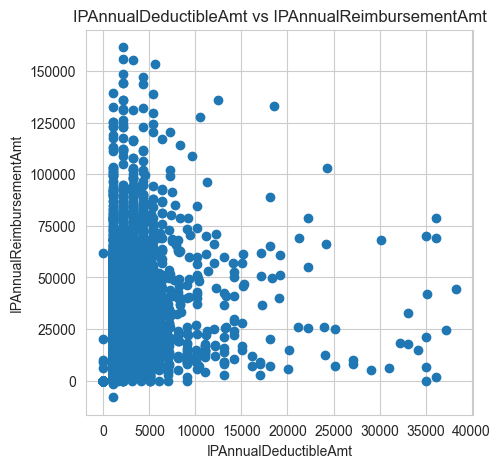

In [36]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(5, 5))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

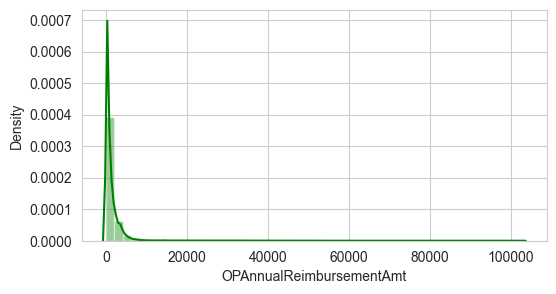

In [37]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(6, 3))
sns.distplot(Train_Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [38]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")

25 , 170.0 || 50 , 570.0 || 75 , 1500.0 || 100 , 102960.0 || 

In [39]:
# Convert Date of Birth and Date of Death from String to Datetime format
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%Y-%m-%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format = '%Y-%m-%d')

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format = '%Y-%m-%d')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],format = '%Y-%m-%d')

In [40]:
# Get the birth month and Birth year for DOB and DOD
Train_Beneficiary['Birth_Year'] = Train_Beneficiary['DOB'].dt.year
Train_Beneficiary['Birth_Month'] = Train_Beneficiary['DOB'].dt.month

Test_Beneficiary['Birth_Year'] = Test_Beneficiary['DOB'].dt.year
Test_Beneficiary['Birth_Month'] = Test_Beneficiary['DOB'].dt.month

In [41]:
#Calculate patient's age based on DOD,
#if DOD is not available calculate age based on the maximum date available in the data
Train_Beneficiary['Patient_Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

Test_Beneficiary['Patient_Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365)
Test_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Test_Beneficiary['DOB']).dt.days)/365),inplace=True)

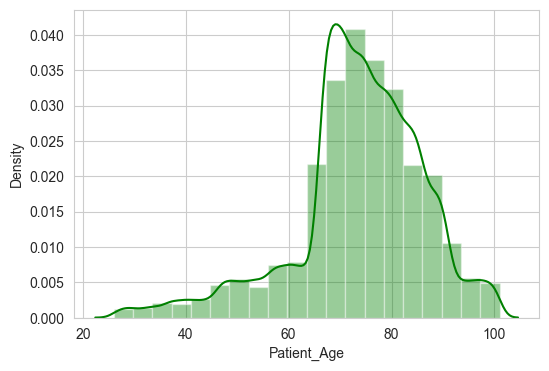

In [42]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.distplot(Train_Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.show()

Observation:
The age distribution of patients shows that individuals aged 60 to 90 make up the majority. In contrast, the number of patients in the 20–40 and 90–100 age groups is significantly lower.

In [43]:
# Set value=1 if the patient is dead i.e DOD value is not null
Train_Beneficiary['isDead'] = 0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(), 'isDead'] = 1
Test_Beneficiary['isDead'] = 0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(), 'isDead'] = 1

# Analyzing Inpatient data

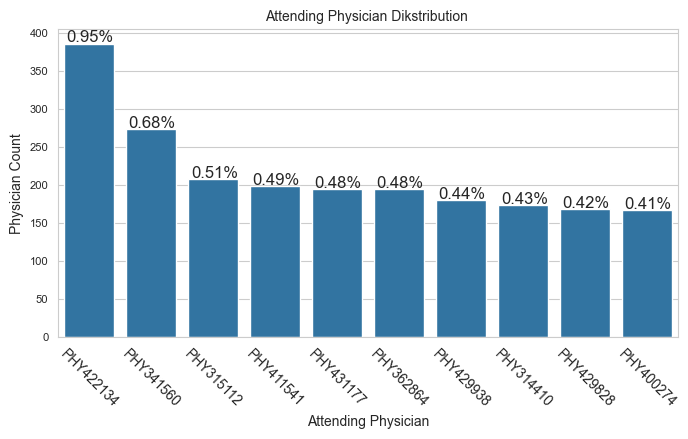

In [44]:
# Plot top 10 Attending Physician in terms of number of patients treated
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['AttendingPhysician'].value_counts().iloc[:10].index)
plt.title('Attending Physician Dikstribution ', fontsize=10)
plt.xlabel('Attending Physician', size = 10)
plt.ylabel('Physician Count', size = 10)
plt.yticks(size=8)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['AttendingPhysician'], 0.02, 2, 12)

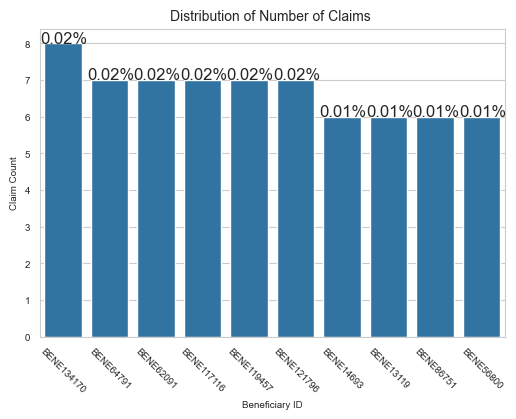

In [45]:
# Distribution of Number of Claims
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='BeneID',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['BeneID'].value_counts().head(10).index)
plt.title('Distribution of Number of Claims ', fontsize=10)
plt.xlabel('Beneficiary ID', size = 7)
plt.ylabel('Claim Count', size = 7)
plt.xticks(rotation=-45)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, Train_Inpatient['BeneID'], 0.02, 0.01, 12)

In [46]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format = '%Y-%m-%d')

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format = '%Y-%m-%d')

In [47]:
#Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatient['Hospitalization_Duration'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatient['Claim_Period'] = ((Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days)+1

Test_Inpatient['Hospitalization_Duration'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1
Test_Inpatient['Claim_Period'] = ((Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days)+1


Observation:
A discrepancy where the number of days claimed for inpatient treatment exceeds the actual number of days hospitalized can be considered suspicious. Therefore, a new feature is being introduced to capture this potential anomaly.



In [48]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
Train_Inpatient['ExtraClaimDays'] = np.where(Train_Inpatient['Claim_Period']>Train_Inpatient['Hospitalization_Duration'], Train_Inpatient['Claim_Period'] - Train_Inpatient['Hospitalization_Duration'], 0)
Test_Inpatient['ExtraClaimDays'] = np.where(Test_Inpatient['Claim_Period']>Test_Inpatient['Hospitalization_Duration'], Test_Inpatient['Claim_Period'] - Test_Inpatient['Hospitalization_Duration'], 0)


In [49]:
# Get the months and year of claim start and claim end
Train_Inpatient['ClaimStart_Year'] = Train_Inpatient['ClaimStartDt'].dt.year
Train_Inpatient['ClaimStart_Month'] = Train_Inpatient['ClaimStartDt'].dt.month
Test_Inpatient['ClaimStart_Year'] = Test_Inpatient['ClaimStartDt'].dt.year
Test_Inpatient['ClaimStart_Month'] = Test_Inpatient['ClaimStartDt'].dt.month

Train_Inpatient['ClaimEnd_Year'] = Train_Inpatient['ClaimEndDt'].dt.year
Train_Inpatient['ClaimEnd_Month'] = Train_Inpatient['ClaimEndDt'].dt.month
Test_Inpatient['ClaimEnd_Year'] = Test_Inpatient['ClaimEndDt'].dt.year
Test_Inpatient['ClaimEnd_Month'] = Test_Inpatient['ClaimEndDt'].dt.month
# Plot distribution of claim start

In [50]:
# Get the month and year of Admission_Year and Admission_Month
Train_Inpatient['Admission_Year'] = Train_Inpatient['AdmissionDt'].dt.year
Train_Inpatient['Admission_Month'] = Train_Inpatient['AdmissionDt'].dt.month
Test_Inpatient['Admission_Year'] = Test_Inpatient['AdmissionDt'].dt.year
Test_Inpatient['Admission_Month'] = Test_Inpatient['AdmissionDt'].dt.month

Train_Inpatient['Discharge_Year'] = Train_Inpatient['DischargeDt'].dt.year
Train_Inpatient['Discharge_Month'] = Train_Inpatient['DischargeDt'].dt.month
Test_Inpatient['Discharge_Year'] = Test_Inpatient['DischargeDt'].dt.year
Test_Inpatient['Discharge_Month'] = Test_Inpatient['DischargeDt'].dt.month

In [51]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Train_Inpatient["ClmProcedureCode_1"],
                                   Train_Inpatient["ClmProcedureCode_2"],
                                   Train_Inpatient["ClmProcedureCode_3"],
                                   Train_Inpatient["ClmProcedureCode_4"],
                                   Train_Inpatient["ClmProcedureCode_5"],
                                   Train_Inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

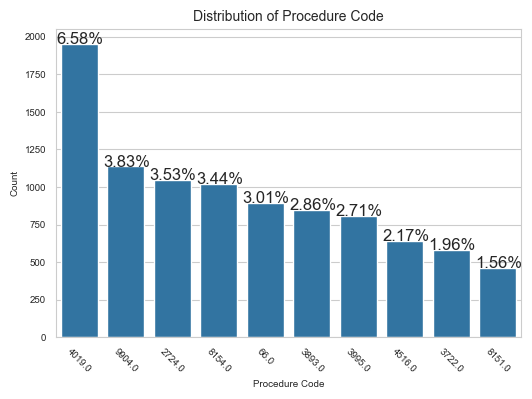

<Figure size 640x480 with 0 Axes>

In [52]:
# Ensure the DataFrame has a unique (reset) index
ClmProcedureCode_IP_df = ClmProcedureCode_IP_df.reset_index(drop=True)

# Plot the countplot for claim procedure codes (Top 10 or 20)
plt.figure(figsize=(6, 4))

top_codes = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(10).index

ax = sns.countplot(
    x='ProcedureCode',
    data=ClmProcedureCode_IP_df,
    order=top_codes
)

plt.title('Distribution of Procedure Code', fontsize=10)
plt.xlabel('Procedure Code', size=7)
plt.ylabel('Count', size=7)
plt.xticks(rotation=-45, size=7)
plt.yticks(size=7)

# Adjust the percentage labels if you're using a custom function
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

plt.tight_layout()  # Helps ensure labels/ticks fit nicely
plt.show()


Observation:
The top five most frequently performed procedures are codes 4019, 9904, 2714, 8154, and 66. Among these, procedure 4019 accounts for approximately 6.5% of all recorded procedures.

In [53]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_Inpatient["ClmDiagnosisCode_1"],
                                           Train_Inpatient["ClmDiagnosisCode_2"],
                                           Train_Inpatient["ClmDiagnosisCode_3"],
                                           Train_Inpatient["ClmDiagnosisCode_4"],
                                           Train_Inpatient["ClmDiagnosisCode_5"],
                                           Train_Inpatient["ClmDiagnosisCode_6"],
                                           Train_Inpatient["ClmDiagnosisCode_7"],
                                           Train_Inpatient["ClmDiagnosisCode_8"],
                                           Train_Inpatient["ClmDiagnosisCode_9"],
                                           Train_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

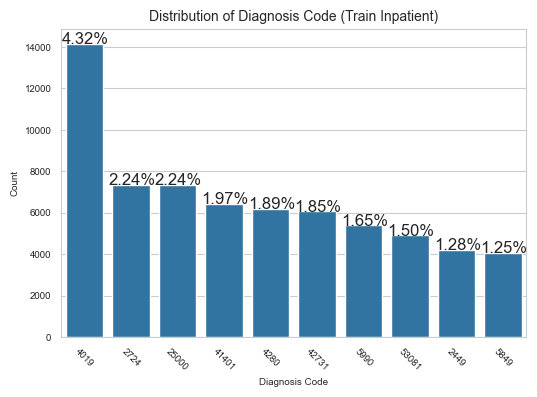

<Figure size 640x480 with 0 Axes>

In [54]:
# Reset index to avoid duplicate index labels
ClmDiagnosisCode_IP_df = ClmDiagnosisCode_IP_df.reset_index(drop=True)

# Plot the countplot for claim diagnosis codes (Top 10 or 20)
plt.figure(figsize=(6, 4))

top_10 = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(10).index

ax = sns.countplot(
    x='DiagnosisCode',
    data=ClmDiagnosisCode_IP_df,
    order=top_10
)

plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=10)
plt.xlabel('Diagnosis Code', size=7)
plt.ylabel('Count', size=7)
plt.xticks(rotation=-45, size=7)
plt.yticks(size=7)

percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)

plt.tight_layout()  # Helps reduce label overlap
plt.show()


Observation:
The most commonly recorded diagnoses are codes 4019, 2724, 25000, 41401, and 4280. Among these, diagnosis code 4019 appears most frequently, making up approximately 4.3% of all diagnoses.

# Analyzing outpatient data

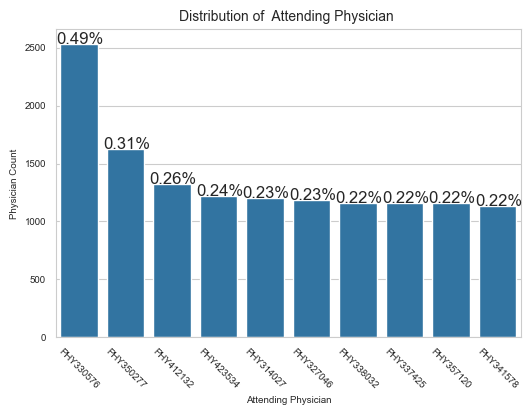

In [55]:
# Top 10 attending physician in terms of patient count
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['AttendingPhysician'].value_counts().iloc[:10].index)
plt.title('Distribution of  Attending Physician ', fontsize=10)
plt.xlabel('Attending Physician', size =7)
plt.ylabel('Physician Count', size = 7)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, Train_Outpatient['AttendingPhysician'], 0.02, 2, 12)

Observation:
The top five attending physicians based on patient visits are PHY330576, PHY350277, PHY412132, PHY423534, and PHY314027. Among them, PHY330576 attended to approximately 0.5% of all patients.

In [56]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

In [57]:
# Get the months and year of claim start and claim end
Train_Outpatient['ClaimStart_Year'] = Train_Outpatient['ClaimStartDt'].dt.year
Train_Outpatient['ClaimStart_Month'] = Train_Outpatient['ClaimStartDt'].dt.month
Test_Outpatient['ClaimStart_Year'] = Test_Outpatient['ClaimStartDt'].dt.year
Test_Outpatient['ClaimStart_Month'] = Test_Outpatient['ClaimStartDt'].dt.month

Train_Outpatient['ClaimEnd_Year'] = Train_Outpatient['ClaimEndDt'].dt.year
Train_Outpatient['ClaimEnd_Month'] = Train_Outpatient['ClaimEndDt'].dt.month
Test_Outpatient['ClaimEnd_Year'] = Test_Outpatient['ClaimEndDt'].dt.year
Test_Outpatient['ClaimEnd_Month'] = Test_Outpatient['ClaimEndDt'].dt.month
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatient['Claim_Period'] = ((Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days)+1

Test_Outpatient['Claim_Period'] = ((Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days)+1


In [58]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Train_Outpatient["ClmProcedureCode_1"],
                                   Train_Outpatient["ClmProcedureCode_2"],
                                   Train_Outpatient["ClmProcedureCode_3"],
                                   Train_Outpatient["ClmProcedureCode_4"],
                                   Train_Outpatient["ClmProcedureCode_5"],
                                   Train_Outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

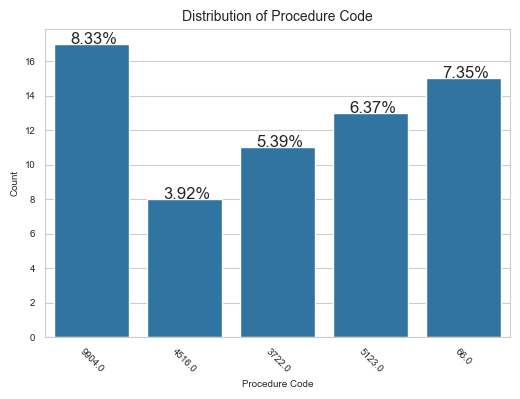

In [59]:
# Plot the countplot for claim precedure codes (Top 5)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(5).index)
plt.title('Distribution of Procedure Code', fontsize=10)
plt.xlabel('Procedure Code', size = 7)
plt.ylabel('Count', size = 7)
plt.xticks(rotation=-45)
plt.yticks(size=7)
plt.xticks(rotation=-45, size=7)
percentage_without_hue(ax, ClmProcedureCode_OP_df['ProcedureCode'], 0.02, 0.01, 12)

Observation:
Procedure code 9904 accounts for approximately 7.35% of all procedures performed, making it one of the more frequently conducted procedures.

In [60]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_Inpatient['Inpatient_or_Outpatient'] = 1
Train_Outpatient['Inpatient_or_Outpatient'] = 0
Test_Inpatient['Inpatient_or_Outpatient'] = 1
Test_Outpatient['Inpatient_or_Outpatient'] = 0

In [61]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_Outpatient.columns if idx in Train_Inpatient.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient, Train_Outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')


['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [62]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train , how = 'inner', on = 'Provider' )


In [63]:
# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in Test_Outpatient.columns if idx in Test_Inpatient.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(Test_Inpatient, Test_Outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, Test_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, Test , how = 'inner', on = 'Provider' )


In [64]:
Final_Dataset_Train.shape

(558211, 72)

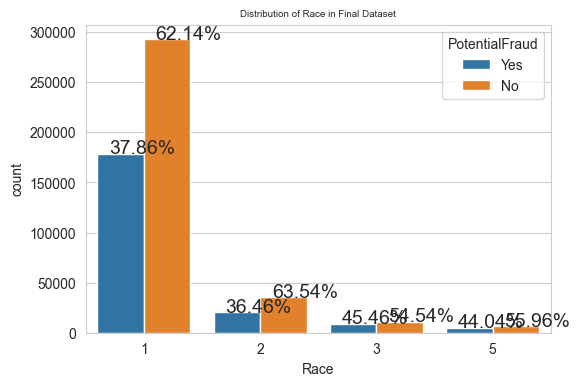

In [65]:
# Distribution of race in Overall data
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Race',y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Final_Dataset_Train['Race'].value_counts().index)
plt.title('Distribution of Race in Final Dataset', size = 7)
percentage_with_hue(ax, Final_Dataset_Train.Race, 4,2,-0.1,200, 14)

Observation:
Race 1 has the highest volume of transactions, with 37.8% of those being fraudulent. However, Race 3 exhibits the highest proportion of fraudulent transactions at 45.5%. This suggests that race may play a significant role in identifying potential fraud.



In [66]:
#Calculatinng total and percentage money lost for Inpatient
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_Money_Fraud_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].sum()
print("Total_Money_Spent_Inpatient : ",Total_Money_Spent_Inpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Inpatient/Total_number_of_inpatient_claims))
print("Total_Money_Fraud_Inpatient : ",Total_Money_Fraud_Inpatient)
print("Percentage of money spent in fraud for Inpatient = {:.2f}%".format(Total_Money_Fraud_Inpatient/Total_Money_Spent_Inpatient *100))


Total_Money_Spent_Inpatient :  408297020
Average reimbursed amount per patient : 10088
Total_Money_Fraud_Inpatient :  241288510
Percentage of money spent in fraud for Inpatient = 59.10%


In [67]:
#Calculatinng total and percentage money lost for Outpatient
Total_number_of_Outpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].count()
Total_Money_Fraud_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].sum()
print("Total_Money_Spent_Outpatient : ",Total_Money_Spent_Outpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Outpatient/Total_number_of_Outpatient_claims))
print("Total_Money_Fraud_Outpatient : ",Total_Money_Fraud_Outpatient)
print("Percentage of money spent in fraud for Outpatient = {:.2f}%".format(Total_Money_Fraud_Outpatient/Total_Money_Spent_Outpatient *100))


Total_Money_Spent_Outpatient :  148246120
Average reimbursed amount per patient : 286
Total_Money_Fraud_Outpatient :  54392610
Percentage of money spent in fraud for Outpatient = 36.69%


In [68]:
#Calculatinng total and percentage money lost for overall data
Total_Money_Fraud = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent = Final_Dataset_Train.InscClaimAmtReimbursed.sum()
print("Total_Money_Spent : ",Total_Money_Spent)
print("Total_Money_Fraud : ",Total_Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Total_Money_Fraud/Total_Money_Spent *100))

Total_Money_Spent :  556543140
Total_Money_Fraud :  295681120
Percentage of money spent in fraud = 53.13%


Observation:
Fraudulent activity is more prevalent in inpatient data, likely due to the significantly higher financial stakes. The average reimbursement amount for inpatient claims is $10,088—approximately 35 times greater than the average of $286 for outpatient claims.
As a result, fraudulent inpatient transactions have led to a substantial financial impact, with $295,681,120 lost—accounting for 53% of the total reimbursement amount of $556,543,140.



In [69]:
# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']
#

In [70]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [71]:
len(Final_Dataset_Train.columns)

74

In [72]:
len(Final_Dataset_Test.columns)

73

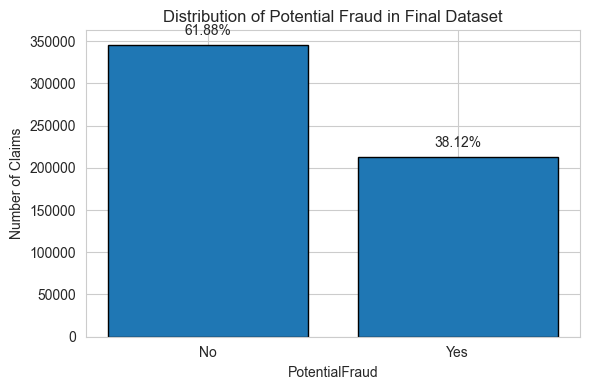

In [73]:
# Count of fraud vs non-fraud
counts = Final_Dataset_Train['PotentialFraud'].value_counts()
total = counts.sum()
percentages = counts / total * 100

# Plot bar chart with percentage annotations
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(counts.index, counts.values, edgecolor='black')

# Annotate each bar with percentage
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax.annotate(
        f'{pct:.2f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),  # vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

# Labels and title
ax.set_xlabel('PotentialFraud')
ax.set_ylabel('Number of Claims')
ax.set_title('Distribution of Potential Fraud in Final Dataset')

plt.tight_layout()
plt.show()


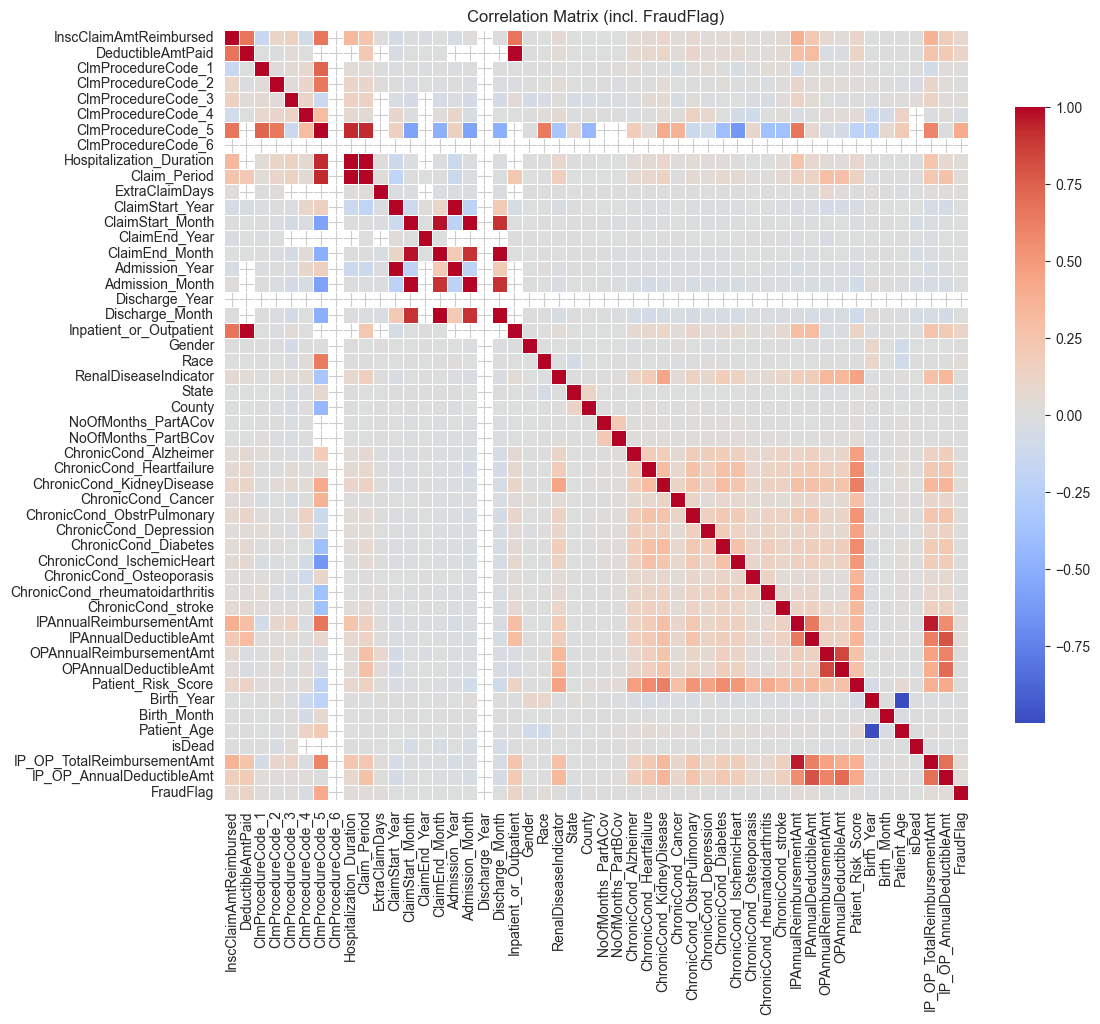

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# first, map fraud to numeric
Final_Dataset_Train['FraudFlag'] = Final_Dataset_Train['PotentialFraud'].map({'Yes':1, 'No':0})

# select only numeric columns
num = Final_Dataset_Train.select_dtypes(include='number')

# compute correlation matrix
corr = num.corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Matrix (incl. FraudFlag)')
plt.show()


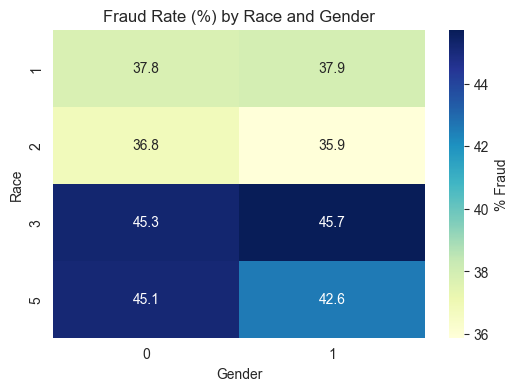

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# build a pivot table of mean(FraudFlag)
Final_Dataset_Train['FraudFlag'] = Final_Dataset_Train['PotentialFraud'].map({'Yes':1,'No':0})
pivot = pd.pivot_table(
    Final_Dataset_Train,
    values='FraudFlag',
    index='Race',
    columns='Gender',
    aggfunc='mean'
)

plt.figure(figsize=(6,4))
sns.heatmap(
    pivot*100,         # multiply by 100 to get percentages
    annot=True,        # show numbers
    fmt=".1f",         # one decimal place
    cmap='YlGnBu',
    cbar_kws={'label':'% Fraud'}
)
plt.title('Fraud Rate (%) by Race and Gender')
plt.ylabel('Race')
plt.xlabel('Gender')
plt.show()


# Missing value imputations

In [76]:
# find the columns which contain null values
Final_Dataset_Train.columns[Final_Dataset_Train.isnull().any()].tolist()

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month',
 'DOD']

Observation:

Missing values in the AttendingPhysician, OperatingPhysician, and OtherPhysician columns can be safely replaced with zero, indicating the absence of a recorded physician.

Similarly, any missing diagnosis codes and procedure codes can be imputed with zeros.

For outpatient data, fields like Admission Date and Length of Stay are not applicable and can be filled with zero.

The Date of Death (DOD) is only relevant for deceased beneficiaries, so for living individuals, missing values can be set to zero.

All other missing values in the dataset may also be filled with zeros, assuming they indicate absence or non-applicability rather than data loss.

In [77]:
## Fill missing results using 0
Final_Dataset_Train = Final_Dataset_Train.fillna(0).copy()
Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

In [78]:
Final_Dataset_Train.isna().sum().sum()

np.int64(0)

In [79]:
Final_Dataset_Test.isna().sum().sum()

np.int64(0)

In [81]:
Final_Dataset_Train.to_csv('C:/Users/Asus/Desktop/Final_Implementation/Processed/Final_Dataset_Train.csv')
Final_Dataset_Test.to_csv('C:/Users/Asus/Desktop/Final_Implementation/Processed/Final_Dataset_Test.csv')